In [25]:
import os
import numpy as np

import matplotlib.pyplot as plt
import shutil
import glob

!pip install pims_nd2
from pims import ND2Reader_SDK

In [39]:
def file_nd2_to_png(IMPORT_PATH, EXPORT_PATH):
    
    image_path_list = list()
    for file in os.listdir(IMPORT_PATH):
        if os.path.splitext(file)[1] == ".nd2":
            base, ext = os.path.splitext(file)
            image_path_list.append(file)
    
    frame_lst = list()
    for i in range(len(image_path_list)):
        with ND2Reader_SDK(f"{IMPORT_PATH}/{sorted(image_path_list)[i]}") as frames:
            #print(frames)
            frames.iter_axes = 'c'
            frame_lst.append(frames[2])

    output_path_list = list(i for i in range(len(frame_lst)))
    os.makedirs(EXPORT_PATH, exist_ok = True)
    dirname =f"{EXPORT_PATH}"
    
    for i in range(len(frame_lst)):
        img = frame_lst[i][9]
        plt.imshow(img)
        filename = dirname + f"{os.path.splitext(sorted(image_path_list)[i])[0]}.png"
        plt.savefig(filename)
              
    print('終わったよ！！')

終わったよ！！


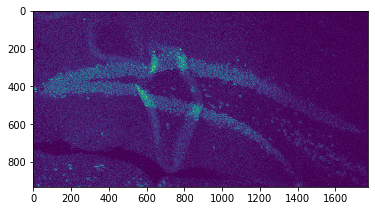

In [40]:
IMPORT_PATH = '/Volumes/Miyake/MS-059/neun/'
EXPORT_PATH = '/Volumes/Miyake/MS-059/neun_png/'

file_nd2_to_png(IMPORT_PATH, EXPORT_PATH)